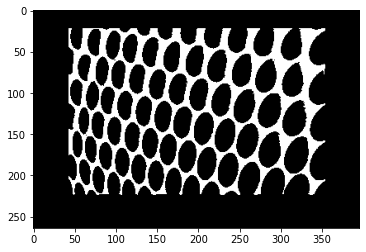

54
Area of contour 0  is  412.5
Area of contour 1  is  608.5
Area of contour 2  is  366.5
Area of contour 3  is  556.5
Area of contour 4  is  862.0
Area of contour 5  is  524.5
Area of contour 6  is  784.5
Area of contour 7  is  464.5
Area of contour 8  is  725.0
Area of contour 9  is  1077.0
Area of contour 10  is  403.0
Area of contour 11  is  659.0
Area of contour 12  is  951.0
Area of contour 13  is  346.5
Area of contour 14  is  613.0
Area of contour 15  is  915.0
Area of contour 16  is  562.5
Area of contour 17  is  839.5
Area of contour 18  is  499.0
Area of contour 19  is  787.0
Area of contour 20  is  448.0
Area of contour 21  is  365.0
Area of contour 22  is  719.0
Area of contour 23  is  662.0
Area of contour 24  is  1012.5
Area of contour 25  is  599.5
Area of contour 26  is  964.5
Area of contour 27  is  553.0
Area of contour 28  is  866.5
Area of contour 29  is  469.5
Area of contour 30  is  787.5
Area of contour 31  is  458.5
Area of contour 32  is  410.0
Area of contour

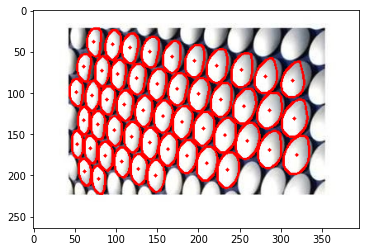

In [4]:
import cv2
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread('lines.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
#image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

print(len(contours))

#print(contours)

# show the image with the drawn contours


#iterate through contours list
count=0
for c in contours:
    area = cv2.contourArea(c)

    if area > 3 and area < 5000 :
        M = cv2.moments(c)
        #print(M)
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
        hull = cv2.convexHull(c)
        cv2.circle(image, (cX, cY), 2, (255, 0, 0), -1)
        cv2.drawContours(image, [hull], 0, (255, 0, 0), 2)
        #area = cv2.contourArea(c)
        print('Area of contour', count, ' is ',area)
        count+=1

print(count)
plt.imshow(image)
plt.show()